# Topics of Sociability and Solidarity in Recollections of *All* Survivors of Auschwitz-Birkenau

### Research Questions:

- If one watches testimonies of Birkenau survivors for long, what is the probability that she hears survivors speaking about solidarity and sociability? Are they frequent and recurrent elements of survivors' recollections? Or are they rare topics and survivors rather focus their attention on other topics?
- Compared to the probability of other rare or frequent events in Birkenau, are topics related to solidarity and sociability more or less probable in the narration of survivors?

## Load the relevant data

Load the libraries needed to work with the data

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
%config Completer.use_jedi = False

Set up the paths to data

In [2]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

Load the stationary probability of different topics in the recollections of survivors

In [3]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Use the line below for normalization

In [4]:
p_complete['stationary_prob_normalized'] = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0] / p_complete['stationary_prob']

In [5]:
p_complete['stationary_prob_normalized_to_escape'] =  p_complete['stationary_prob']/p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

In [6]:
p_complete['stationary_prob_normalized_to_escape'].describe()

count    612.000000
mean       2.058896
std        6.492381
min        0.001313
25%        0.106497
50%        0.311339
75%        1.168508
max       73.437017
Name: stationary_prob_normalized_to_escape, dtype: float64

In [7]:
p_complete['stationary_prob_normalized'].describe()

count      612.000000
mean       905.548463
std       2845.513905
min          1.000000
25%         62.846989
50%        235.875580
75%        689.569870
max      55913.310798
Name: stationary_prob_normalized, dtype: float64

Show the 25 most significant topics

In [8]:
display(p_complete[0:25])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,selections,0.058281,1.000000,73.437017
1,1,intake procedures,0.052358,1.113129,65.973489
2,2,living conditions,0.046331,1.257940,58.378779
3,3,forced labor,0.041114,1.417541,51.805932
4,4,food,0.034210,1.703644,43.105837
5,5,mass murder awareness,0.031151,1.870925,39.251716
6,6,camp adaptation methods,0.024370,2.391509,30.707393
7,7,departure,0.023897,2.438822,30.111676
8,8,Appell,0.022992,2.534866,28.970769
9,9,housing conditions,0.018568,3.138782,23.396657


## Identify relevant topics

### Identify the facto significant and everyday events

Identify "selection"

In [9]:
selection = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0]

Identify "Appell"

In [10]:
Appell = p_complete[p_complete.topic_name=='Appell']['stationary_prob'].values[0]

Identify "clothes"

In [11]:
clothes = p_complete[p_complete.topic_name=='clothing']['stationary_prob'].values[0]

Identify "tattoo"

In [12]:
tattoo = p_complete[p_complete.topic_name=='prisoner tattoos']['stationary_prob'].values[0]

### Identify the facto rare events

In [13]:
escapes = p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

### Identify topics related to sociability

Identify the topic relating to social relations

In [14]:
social_bonds = p_complete[p_complete.topic_name=='social relations']['stationary_prob'].values[0]

In [15]:
friends = p_complete[p_complete.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [16]:
aid_giving = p_complete[p_complete.topic_name=='aid giving']['stationary_prob'].values[0]

In [17]:
food_sharing = p_complete[p_complete.topic_name=='food sharing']['stationary_prob'].values[0]

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is more probable than "tattoos"; yet is the 13th most probable topic. It is therefore part of the upper quartile that contains the most probable topics addressed by survivors.

### Quantitative evidence

In [18]:
print (aid_giving)

0.0144396059878294


In [19]:
print (selection/aid_giving)

4.036210909506819


In [20]:
display(p_complete[p_complete.topic_name=='aid giving'])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
12,12,aid giving,0.01444,4.036211,18.194544


In [21]:
print (tattoo)

0.0097677520947675


In [22]:
print (aid_giving/tattoo)

1.4782936593532683


In [23]:
upper_quantile = p_complete.stationary_prob.quantile([0.75]).values[0]
print (upper_quantile)

0.0009273548711686


In [24]:
print (aid_giving>upper_quantile)

True


## Observation 2

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is significantly more probable
(20 times) than "Escape".

### Quantitative evidence

In [25]:
print (aid_giving)

0.0144396059878294


In [26]:
print (escapes)

0.0007936228600285


In [27]:
print (aid_giving/escapes)

18.19454392645753


## Observation 3

### Qualitative description:

The topic describing various forms of social activity ("social relations") is more significant than tattoo; it is the 17th most probable topic, and it is also part of the upper quartile. It is also more probable (18 times) than escapes .

### Quantitative evidence

In [28]:
print (social_bonds)

0.0126124261229281


In [29]:
display(p_complete[0:18])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,selections,0.058281,1.000000,73.437017
1,1,intake procedures,0.052358,1.113129,65.973489
2,2,living conditions,0.046331,1.257940,58.378779
3,3,forced labor,0.041114,1.417541,51.805932
4,4,food,0.034210,1.703644,43.105837
5,5,mass murder awareness,0.031151,1.870925,39.251716
6,6,camp adaptation methods,0.024370,2.391509,30.707393
7,7,departure,0.023897,2.438822,30.111676
8,8,Appell,0.022992,2.534866,28.970769
9,9,housing conditions,0.018568,3.138782,23.396657


In [30]:
print (social_bonds/Appell)

0.5485603892553079


In [31]:
print (social_bonds/tattoo)

1.291231186107238


In [32]:
print (selection/social_bonds)

4.620942445887359


In [33]:
print (social_bonds>upper_quantile)

True


In [34]:
print (social_bonds/escapes)

15.892216263119199


## Observation 4

### Qualitative description:

The topic describing sociability is more significant (1.5 times) than memories related to clothes. Similarly, the topic describing acts of solidarity is more significant (1.7 times) than memories related to clothes.

# Comments
## Tim
- 1.2 is a low number, it would be important to know that it's actually  significant

## Gabor
- should we just say that "topic describing sociability is slightly more probable as topic indicating memories related to clothes", ie. leave out significance?
- alternatively, someone suggested this method to resolve this problem: https://thomasleeper.com/Rcourse/Tutorials/permutationtests.html

### Quantitative evidence

In [35]:
social_bonds/clothes

1.4994488369045382

In [36]:
display(p_complete[p_complete.topic_name=="clothing"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
25,25,clothing,0.008411,6.928867,10.598705


In [37]:
display(p_complete[p_complete.topic_name=="social bonds"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape


In [38]:
aid_giving/clothes

1.7166760933053535

## Observation 5

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

In [39]:
print (friends)

0.0036202381950243


In [40]:
print (friends/escapes)

4.561660679600752


In [41]:
print (selection/friends)

16.098746015430567


## Observation 6

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

In [42]:
print (food_sharing)

0.0037802177312577


In [43]:
print (food_sharing/escapes)

4.763241990184037


In [44]:
print (selection/food_sharing)

15.41744400994238


## Interpretation

In the recollections of survivors of Birkenau, memories related to sociability and acts of solidarity are highly probable and recurrent topics. They do recur in the narrations of many victims independently from each other. Survivors speak about them as often as about other everyday aspects and events of life in Birkenau. This suggests that neither sociability nor acts of solidarity were rare events in Birkenau. If they had been rare and sporadic, survivors would not have addressed them very often in their recollections either. They would discuss these topics as often as topics related to de facto rare events such as for instance escape. 

It is important to underline that survivors were not asked by interviewers to address solidarity and sociability. It was their decision to address these topics. The stationary probability measured above actually describe the overall probability that interviews with survivors go towards these topics.

Nevertheless this interpretation raises two questions to be addressed in the Discussion part:
- The fact that survivors recall occasions of solidarity or sociability does not indicate that they were frequent events in the past; they are just frequent in their memories
- They might recall them because they are always salient aspects of human life and not because they were frequent elements of everyday life in Birkenau


## Visualization

A word cloud rendering the stationary probability of key topics in recollections of Birkenau survivors. 

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /var/folders/xs/sj3jhyss5c54vc9k08_ghz39q764f6/T/matplotlib-abydj_2j because the default path (/Users/gmt28/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /miniconda3/envs/au_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /miniconda3/envs/au_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /miniconda3/envs/au_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam

In [47]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

In [48]:
#p_complete['stationary_prob_normalized'] = 1/(p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']) 
p_complete =  p_complete[0:30].append(p_complete[p_complete.topic_name=='escapes'])
wfreqs = p_complete.set_index('topic_name')['stationary_prob'].to_dict()

In [49]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    if (word =="social relations") or (word =="aid giving") or (word =="friends") or (word =="food sharing"):
        return 'red'
    elif (word =="prisoner tattoos") or (word =="clothing") or (word == "escapes"):
        return 'blue'
    else:
        return 'black'

In [50]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs)

In [51]:
wordcloud.font_path

'/miniconda3/envs/au_env/lib/python3.7/site-packages/wordcloud/DroidSansMono.ttf'

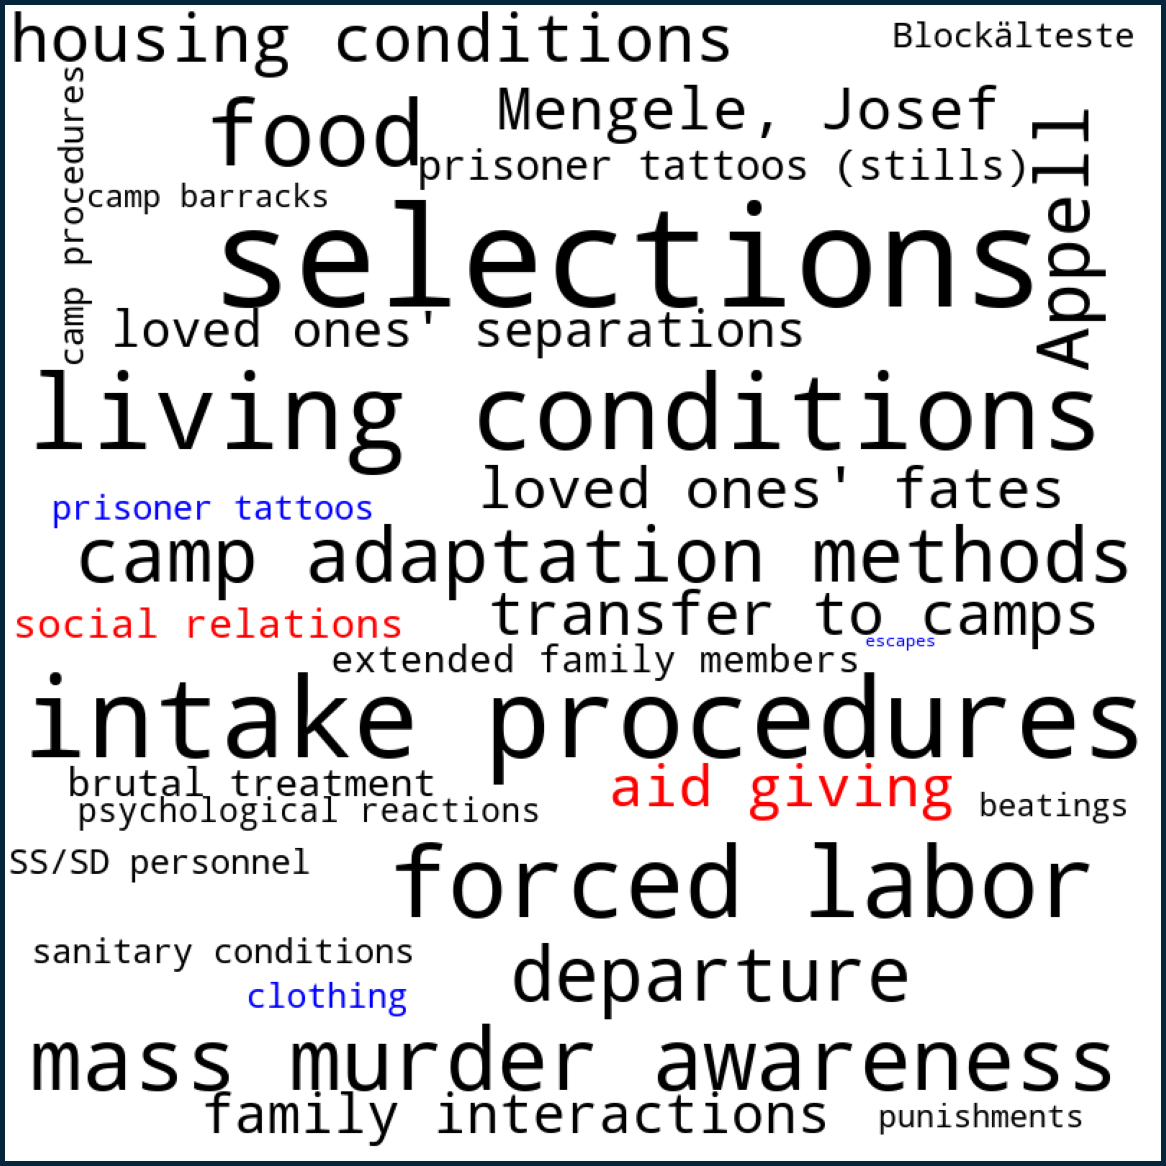

In [54]:
# plot the WordCloud image
fig, ax = plt.subplots(1, 1, figsize=(16, 16), facecolor=None,edgecolor="#04253a",linewidth=10)
ax.imshow(wordcloud)
ax.axis("off")
fig.tight_layout(pad=0)
fig.savefig("Figure_1.png",edgecolor=fig.get_edgecolor())